In [3]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv(r"https://raw.githubusercontent.com/meleshko-anastasiia/DZ/refs/heads/main/marketing_AB.csv")
df

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14
...,...,...,...,...,...,...,...
588096,588096,1278437,ad,False,1,Tuesday,23
588097,588097,1327975,ad,False,1,Tuesday,23
588098,588098,1038442,ad,False,3,Tuesday,23
588099,588099,1496395,ad,False,1,Tuesday,23


In [33]:
df['test group'].unique()

array(['ad', 'psa'], dtype=object)

In [34]:
df['most ads day'].unique()

array(['Monday', 'Tuesday', 'Friday', 'Saturday', 'Wednesday', 'Sunday',
       'Thursday'], dtype=object)

In [35]:
df['converted'].unique()

array([False,  True])

In [8]:
df.shape

(588101, 7)

In [17]:
control_group = df[df['test group'] == 'psa']
control_group.shape

(23524, 7)

In [32]:
test_group = df[df['test group'] == 'ad']
test_group.shape

(564577, 7)

In [49]:
df[df['converted'] == 'True'].shape

(0, 7)

In [5]:
df.drop(columns = ['Unnamed: 0', 'user id'], inplace = True)
df

,test group,converted,total ads,most ads day,most ads hour
0,ad,False,130,Monday,20
1,ad,False,93,Tuesday,22
2,ad,False,21,Tuesday,18
3,ad,False,355,Tuesday,10
4,ad,False,276,Friday,14
...,...,...,...,...,...
588096,ad,False,1,Tuesday,23
588097,ad,False,1,Tuesday,23
588098,ad,False,3,Tuesday,23
588099,ad,False,1,Tuesday,23


In [6]:
df.head(10)

,test group,converted,total ads,most ads day,most ads hour
0,ad,False,130,Monday,20
1,ad,False,93,Tuesday,22
2,ad,False,21,Tuesday,18
3,ad,False,355,Tuesday,10
4,ad,False,276,Friday,14
5,ad,False,734,Saturday,10
6,ad,False,264,Wednesday,13
7,ad,False,17,Sunday,18
8,ad,False,21,Tuesday,19
9,ad,False,142,Monday,14


In [ ]:
# Статистические тесты

In [84]:
t_stat, p_val = stats.ttest_ind(test_group['converted'], control_group['converted'])
print(f"Test Group Analysis - T-statistic: {t_stat}, P-value: {p_val}")

Test Group Analysis - T-statistic: 7.37040597428566, P-value: 1.7033052627831264e-13


In [81]:
#Отвергнем нулевую гипотезу: существует значительная разница в показателях конверсии между группами 'ad' и 'psa'

In [85]:
# Большинство за день
result_day = stats.f_oneway(
    df[df['most ads day'] == 'Monday']['converted'],
    df[df['most ads day'] == 'Tuesday']['converted'],
    df[df['most ads day'] == 'Wednesday']['converted'],
    df[df['most ads day'] == 'Thursday']['converted'],
    df[df['most ads day'] == 'Friday']['converted'],
    df[df['most ads day'] == 'Saturday']['converted'],
    df[df['most ads day'] == 'Sunday']['converted']
)
print(f"Most Ads Day Analysis - F-statistic: {result_day.statistic}, P-value: {result_day.pvalue}")

Most Ads Day Analysis - F-statistic: 68.38818386898062, P-value: 1.8032007655359558e-85


In [80]:
#Отвергнем нулевую гипотезу: день, в который было просмотрено больше всего объявлений, существенно влияет на коэффициент конверсии.

In [86]:
# Анализ большинства рекламных объявлений за час
result_hour = stats.f_oneway(
    df[df['most ads hour'] == 0]['converted'],
    df[df['most ads hour'] == 1]['converted'],
    df[df['most ads hour'] == 2]['converted'],
    df[df['most ads hour'] == 3]['converted'],
    df[df['most ads hour'] == 4]['converted'],
    df[df['most ads hour'] == 5]['converted'],
    df[df['most ads hour'] == 6]['converted'],
    df[df['most ads hour'] == 7]['converted'],
    df[df['most ads hour'] == 8]['converted'],
    df[df['most ads hour'] == 9]['converted'],
    df[df['most ads hour'] == 10]['converted'],
    df[df['most ads hour'] == 11]['converted'],
    df[df['most ads hour'] == 12]['converted'],
    df[df['most ads hour'] == 13]['converted'],
    df[df['most ads hour'] == 14]['converted'],
    df[df['most ads hour'] == 15]['converted'],
    df[df['most ads hour'] == 16]['converted'],
    df[df['most ads hour'] == 17]['converted'],
    df[df['most ads hour'] == 18]['converted'],
    df[df['most ads hour'] == 19]['converted'],
    df[df['most ads hour'] == 20]['converted'],
    df[df['most ads hour'] == 21]['converted'],
    df[df['most ads hour'] == 22]['converted'],
    df[df['most ads hour'] == 23]['converted']
)
print(f"Most Ads Hour Analysis - F-statistic: {result_hour.statistic}, P-value: {result_hour.pvalue}")

Most Ads Hour Analysis - F-statistic: 18.742037312974496, P-value: 7.482025334833055e-77


In [79]:
# Анализ часов показа большинства объявлений опровергает нулевую гипотезу: час, в течение которого было просмотрено больше всего объявлений, существенно влияет на коэффициент конверсии.

In [87]:
# Полный анализ рекламы
df_subset = df[df['total ads'] < 50].copy()


#создать ячейки для total_ads
# Создать ячейки для total_ads, используя .loc
df_subset.loc[:, 'total_ads_bin'] = pd.cut(df_subset['total ads'], bins=[-1, 1, 5, 10, 20, 30, 40, 50], labels=['0-1', '2-5', '6-10', '11-20', '21-30', '31-40', '41-50'])

# для сгруппированных данных
result_bin = stats.f_oneway(
    df_subset[df_subset['total_ads_bin'] == '0-1']['converted'],
    df_subset[df_subset['total_ads_bin'] == '2-5']['converted'],
    df_subset[df_subset['total_ads_bin'] == '6-10']['converted'],
    df_subset[df_subset['total_ads_bin'] == '11-20']['converted'],
    df_subset[df_subset['total_ads_bin'] == '21-30']['converted'],
    df_subset[df_subset['total_ads_bin'] == '31-40']['converted'],
    df_subset[df_subset['total_ads_bin'] == '41-50']['converted']
)

print(f"Total Ads (Binned) Analysis - F-statistic: {result_bin.statistic}, P-value: {result_bin.pvalue}")

Total Ads (Binned) Analysis - F-statistic: 1245.6689124986833, P-value: 0.0


In [78]:
# Отвергнем нулевую гипотезу: существует существенная разница в показателях конверсии между различными уровнями общего количества просмотренных объявлений (в бинах).

In [68]:
# Вывод: AD успешнее чем PSA.

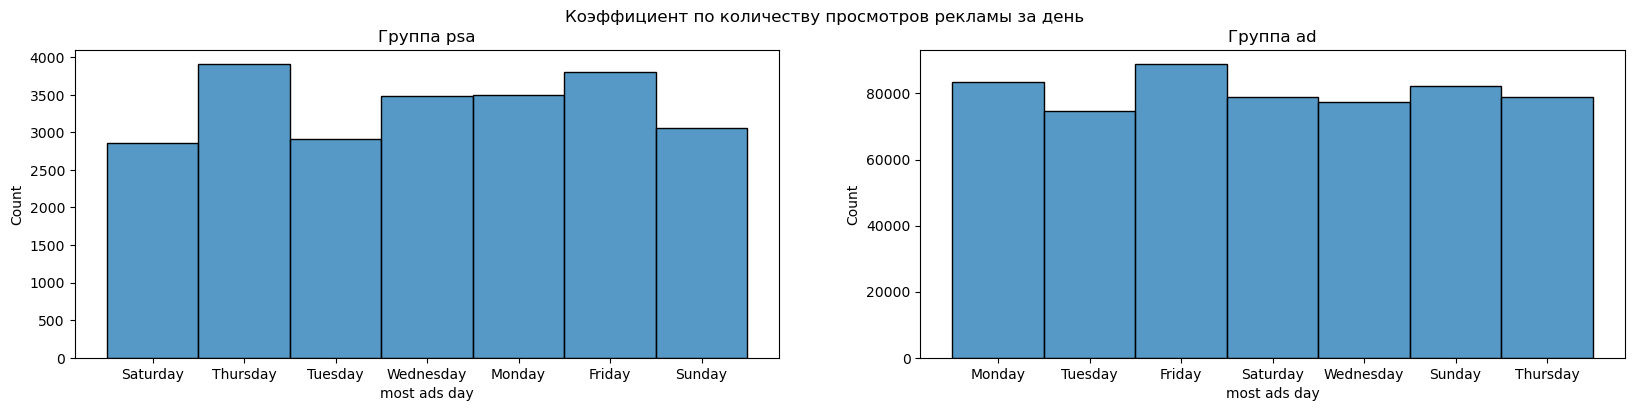

In [89]:
fig, ax = plt.subplots(1,2, figsize = (20,4))
plt.suptitle('Коэффициент по количеству просмотров рекламы за день')
sns.histplot(control_group['most ads day'], ax = ax[0])
sns.histplot(test_group['most ads day'], ax = ax[1])
ax[0].set_title('Группа psa')
ax[1].set_title('Группа ad')
plt.show()

In [90]:
# Вывод:
#Коэфициент psa больше в четверг и пятницу, а в субботу и вторник реклама менее эффективна
#Коэфициент ad больше в пятницу, а во вторник реклама менее эффективна

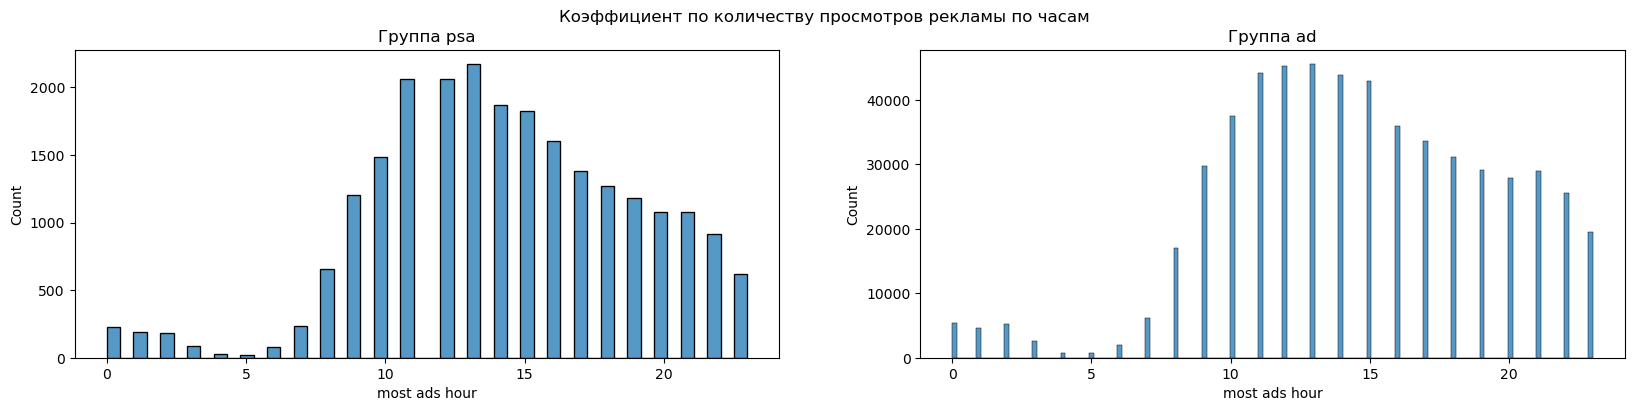

In [76]:
fig, ax = plt.subplots(1,2, figsize = (20,4))
plt.suptitle('Коэффициент по количеству просмотров рекламы по часам')
sns.histplot(control_group['most ads hour'], ax = ax[0])
sns.histplot(test_group['most ads hour'], ax = ax[1])
ax[0].set_title('Группа psa')
ax[1].set_title('Группа ad')
plt.show()

In [91]:
# Вывод: :Коэфициент больше всего в 13, а в 5 реклама менее эффективна